In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
#from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
#from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
import scipy as sp
from scipy import stats
import pysal as ps
#sys.path.append("/home/cusp/fbianco/choroplethNYC/")
import choroplethNYC as cp
#from importlib import reload

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

#print("PUIDATA", os.getenv("PUIDATA"))

In [7]:
cd Midterm_Folder/

/nfshome/mb6203/PUI2018/Midterm_Folder


In [4]:
os.getenv("PUIDATA")

'/nfshome/mb6203/PUIDATA'

In [ ]:
url = "https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip"
urllib.request.urlretrieve(url, "zip_codes.gz")

In [ ]:
!unzip -d $PUIDATA zip_codes.gz

In [9]:
nyc_zipcodes = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "ZIP_CODE_040114.shp")

In [10]:
nyc_zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [11]:
nyc_zipcodes.dtypes

ZIPCODE        object
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

In [12]:
nyc_zipcodes['ZIPCODE'] = nyc_zipcodes['ZIPCODE'].astype(int)

In [13]:
nyc_zipcodes.dtypes

ZIPCODE         int64
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

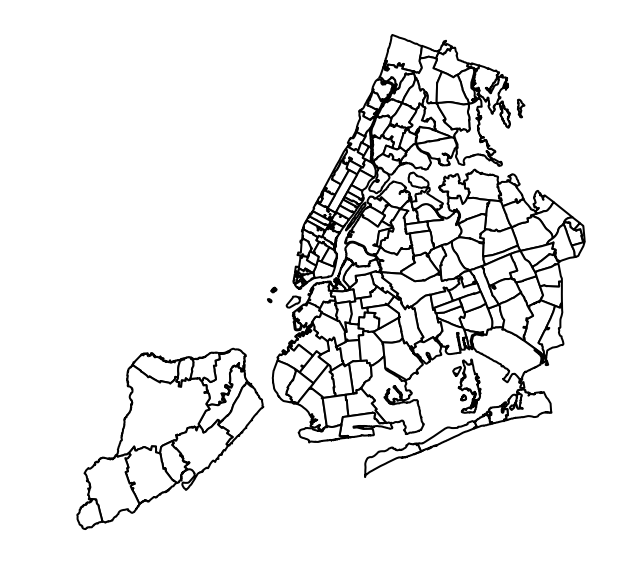

In [14]:
# using the built in plot function as pumashp.plot(pumashp....)
# using a choroplethNYC function that FBB wrote
cp.choroplethNYC(nyc_zipcodes, column=None, color="white", edgecolor="black", lw=2);



In [15]:
projects = pd.read_csv('https://data.cityofnewyork.us/api/views/dzgh-ja44/rows.csv?accessType=DOWNLOAD')

In [16]:
projects.head()

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,Borough,Location 1,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,P.S. 101 - BROOKLYN,K,21,Addition,65999000.0,CAP,K101,2360 BENSON AVENUE,Brooklyn,11214.0,BROOKLYN,"(40.597863, -73.991693)",40.597863,-73.991693,11.0,47.0,302.0,3185973.0,3.068750e+09,Bensonhurst East ...
1,P.S./I.S. 338 - BROOKLYN,K,22,Demo,739309.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218.0,BROOKLYN,"(40.645199, -73.97052)",40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...
2,P.S./I.S. 338 - BROOKLYN,K,22,New,67683691.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218.0,BROOKLYN,"(40.645199, -73.97052)",40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...
3,PRE-K CENTER @ 369 93RD STREET - BROOKLYN,K,20,New,27637000.0,CAP,K613,369 93RD STREET,Brooklyn,11209.0,BROOKLYN,"(40.618041, -74.031381)",40.618041,-74.031381,10.0,43.0,58.0,3155119.0,3.061030e+09,Bay Ridge ...
4,PRE-K CENTER @ 219 25TH STREET - BROOKLYN,K,15,Lease,8464400.0,CAP,K661,219 25TH STREET,Brooklyn,11232.0,BROOKLYN,"(40.659882, -73.997016)",40.659882,-73.997016,7.0,38.0,101.0,3336859.0,3.006520e+09,Sunset Park West ...


In [17]:
projects.dropna(inplace=True)

In [18]:
projects['Postcode'] = projects['Postcode'].astype(int)

In [19]:
projects['ZIPCODE'] = projects['Postcode']

In [20]:
projects.head()

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,...,Location 1,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,ZIPCODE
0,P.S. 101 - BROOKLYN,K,21,Addition,65999000.0,CAP,K101,2360 BENSON AVENUE,Brooklyn,11214,...,"(40.597863, -73.991693)",40.597863,-73.991693,11.0,47.0,302.0,3185973.0,3.068750e+09,Bensonhurst East ...,11214
1,P.S./I.S. 338 - BROOKLYN,K,22,Demo,739309.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218,...,"(40.645199, -73.97052)",40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...,11218
2,P.S./I.S. 338 - BROOKLYN,K,22,New,67683691.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218,...,"(40.645199, -73.97052)",40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...,11218
3,PRE-K CENTER @ 369 93RD STREET - BROOKLYN,K,20,New,27637000.0,CAP,K613,369 93RD STREET,Brooklyn,11209,...,"(40.618041, -74.031381)",40.618041,-74.031381,10.0,43.0,58.0,3155119.0,3.061030e+09,Bay Ridge ...,11209
4,PRE-K CENTER @ 219 25TH STREET - BROOKLYN,K,15,Lease,8464400.0,CAP,K661,219 25TH STREET,Brooklyn,11232,...,"(40.659882, -73.997016)",40.659882,-73.997016,7.0,38.0,101.0,3336859.0,3.006520e+09,Sunset Park West ...,11232


In [21]:
nyc_zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [22]:
projects.head()

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,...,Location 1,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,ZIPCODE
0,P.S. 101 - BROOKLYN,K,21,Addition,65999000.0,CAP,K101,2360 BENSON AVENUE,Brooklyn,11214,...,"(40.597863, -73.991693)",40.597863,-73.991693,11.0,47.0,302.0,3185973.0,3.068750e+09,Bensonhurst East ...,11214
1,P.S./I.S. 338 - BROOKLYN,K,22,Demo,739309.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218,...,"(40.645199, -73.97052)",40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...,11218
2,P.S./I.S. 338 - BROOKLYN,K,22,New,67683691.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218,...,"(40.645199, -73.97052)",40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...,11218
3,PRE-K CENTER @ 369 93RD STREET - BROOKLYN,K,20,New,27637000.0,CAP,K613,369 93RD STREET,Brooklyn,11209,...,"(40.618041, -74.031381)",40.618041,-74.031381,10.0,43.0,58.0,3155119.0,3.061030e+09,Bay Ridge ...,11209
4,PRE-K CENTER @ 219 25TH STREET - BROOKLYN,K,15,Lease,8464400.0,CAP,K661,219 25TH STREET,Brooklyn,11232,...,"(40.659882, -73.997016)",40.659882,-73.997016,7.0,38.0,101.0,3336859.0,3.006520e+09,Sunset Park West ...,11232


In [23]:
grouped_projects = projects.groupby('ZIPCODE').count().reset_index()

grouped_projects.head()

,ZIPCODE,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,...,Borough,Location 1,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,10002,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,10003,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2,10007,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,10009,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,10010,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [24]:
type(nyc_zipcodes.head())

geopandas.geodataframe.GeoDataFrame

In [ ]:
#ax = nyc_zipcodes.plot(color='w', edgecolor="black")
#zip_merged = nyc_zipcodes.merge(grouped_projects, on='ZIPCODE').plot(column="Building ID", ax=ax)
#ax.axis('off');

In [25]:
zip_merged = nyc_zipcodes.merge(grouped_projects, on='ZIPCODE')

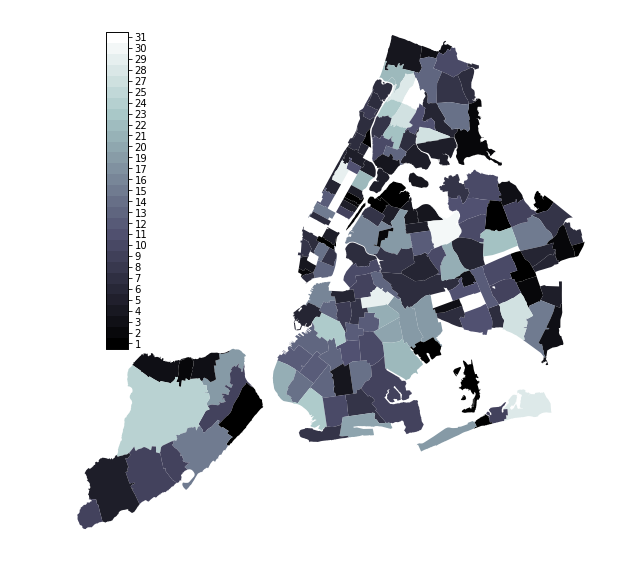

In [26]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
cp.choroplethNYC(zip_merged,
                 column='Building ID', ax=ax, kind="discrete", k=2, #scheme='equal_interval', k=4,
                                   #legend=True, 
                 cmap="bone");
#cp.choroplethNYC(pumashp, column="pcBB", scheme='equal_interval', k=5,
#             cmap="bone", ax=ax, edgecolor="black", cb=True)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
#             markersize=5, cmap="OrRd");

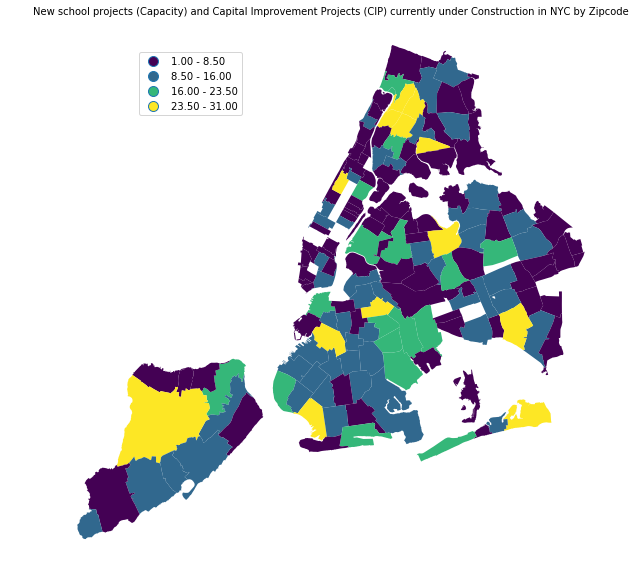

In [27]:
cp.choroplethNYC(zip_merged,
                 column="Building ID", scheme='equal_interval', k=4,
                                   #legend=True, 
                 cmap="viridis");
plt.title("New school projects (Capacity) and Capital Improvement Projects (CIP) currently under Construction in NYC by Zipcode", fontsize=10);
plt.savefig('new school projects in nyc.png')

Note: data updated as of Nov 2, 2018 <br />
Source: https://data.cityofnewyork.us/Housing-Development/Projects-in-Construction-Map/dzgh-ja44


## Figure 1: New school projects (Capacity) and Capital Improvement Projects (CIP) currently under Construction.